In [71]:
#cereals

In [154]:
import pandas as pd
import numpy as np
import seaborn as sbs

In [155]:
d=pd.read_csv("Cereals.csv")

In [156]:
d

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120.0,3.0,5.0,15.0,2.0,8.00,8.00,135.00,0.0,3.0,1.0,1.00,33.98
1,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.00,5.00,320.00,25.0,3.0,1.0,0.33,59.43
2,All-BranwithExtraFiber,K,C,50.0,4.0,0.0,140.0,14.0,8.00,0.00,330.00,25.0,3.0,1.0,0.50,93.70
3,AlmondDelight,R,C,110.0,2.0,2.0,200.0,1.0,14.00,8.00,?,25.0,3.0,1.0,0.75,34.38
4,AppleCinnamonCheerios,G,C,110.0,2.0,2.0,180.0,1.5,10.50,10.00,70.00,25.0,1.0,1.0,0.75,29.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110.0,2.0,1.0,250.0,0.0,21.00,3.00,60.00,25.0,3.0,1.0,0.75,39.11
72,Trix,G,C,110.0,1.0,1.0,140.0,0.0,13.00,12.00,25.00,25.0,2.0,1.0,1.00,27.75
73,WheatChex,R,C,100.0,3.0,1.0,230.0,3.0,17.00,3.00,115.00,25.0,1.0,1.0,0.67,49.79
74,Wheaties,G,C,100.0,3.0,1.0,200.0,3.0,17.00,3.00,110.00,25.0,1.0,1.0,1.00,51.59


In [157]:
#Q1. Create a table with the 5-number summary of all the nutrient

In [158]:
d[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].describe()

,protein,fat,sodium,fiber,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,160.065789,2.048684,28.289474
std,1.089020,1.013159,84.318813,2.219038,22.487813
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,132.500000,0.750000,25.000000
50%,2.500000,1.000000,180.000000,1.750000,25.000000
75%,3.000000,2.000000,212.500000,3.000000,25.000000
max,6.000000,5.000000,320.000000,14.000000,100.000000


In [159]:
#Q2. For each of the numeric attributes (proteins upto vitamins), identify and replace all missing  
#data(indicated with ?) with the arithmetic mean of the attribute.

In [160]:
d=d.mask(d=='?',np.nan)

In [161]:
prot= pd.to_numeric(d.protein,errors='coerce')
d.protein= prot.fillna(prot.mean())

fat= pd.to_numeric(d.fat,errors='coerce')
d.fat= fat.fillna(fat.mean())

sod= pd.to_numeric(d.sodium,errors='coerce')
d.sodium= sod.fillna(sod.mean())

fib= pd.to_numeric(d.fiber,errors='coerce')
d.fiber= fib.fillna(fib.mean())

carb= pd.to_numeric(d.carbo,errors='coerce')
d.carbo= carb.fillna(carb.mean())

sug= pd.to_numeric(d.sugars,errors='coerce')
d.sugars= sug.fillna(sug.mean())

pot= pd.to_numeric(d.potass,errors='coerce')
d.potass= pot.fillna(pot.mean())

vit= pd.to_numeric(d.vitamins,errors='coerce')
d.vitamins= vit.fillna(vit.mean())

In [162]:
#Q3. Create a table with the 5-number summary of all the numeric attributes after treating 
#missing values. Do you think the strategy used in dealing with missing values was effective?

In [163]:
d[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].describe()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,160.065789,2.048684,14.933333,7.040000,96.216216,28.289474
std,1.089020,1.013159,84.318813,2.219038,3.737498,4.377031,66.687384,22.487813
min,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000
25%,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000
50%,2.500000,1.000000,180.000000,1.750000,14.966667,7.000000,90.000000,25.000000
75%,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000
max,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


In [164]:
#this is one of the effective strategies for dealing with missing values in a dataset

In [165]:
#Q4. For each of the numeric attributes (proteins upto vitamins), identify and replace all noisy 
#data with the median of attribute

In [166]:
Q1=d[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(0.25)

In [167]:
Q3=d[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(0.75)

In [168]:
Md=d[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(0.5)

In [169]:
IQR=Q3-Q1
LB=Q1-(1.5*IQR)
UB=Q3+(1.5*IQR)

In [170]:
i=0
for column in d[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]]:
  d[column]=np.where(d[column]>UB[i], Md[i],d[column])
  d[column]=np.where(d[column]<LB[i], Md[i],d[column])
  i=i+1

In [171]:
#Q5. Create a table with the 5-number summary of all the numeric attributes after treating noisy 
#values. Do you think the strategy used in dealing with noisy values was effective?

In [172]:
d[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].describe()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,2.401316,1.013158,181.381579,1.792105,14.933333,7.040000,85.821479,25.0
std,0.875670,1.013159,60.186370,1.520220,3.737498,4.377031,48.062504,0.0
min,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0
25%,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0
50%,2.250000,1.000000,180.000000,1.625000,14.966667,7.000000,90.000000,25.0
75%,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0
max,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0


In [173]:
#yes its an effective method of dealing with noisy data

In [174]:
#Q6. Cross tabulate the type of cereal (hot vs cold) against the manufacturer


In [175]:
pd.crosstab(d.mfr,d.type)

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


In [176]:
#Q7. Which is the cereal with the best rating, worst rating?

In [177]:
best_rating=d.rating.max()
best_cereal=d.loc[d.rating==best_rating,"name"]
worst_rating=d.rating.min()
worst_cereal=d.loc[d.rating==worst_rating,"name"]
print("best cereal is:",best_cereal)
print("worst cereal is:",worst_cereal)


best cereal is: 2    All-BranwithExtraFiber
Name: name, dtype: object
worst cereal is: 9    CapnCrunch
Name: name, dtype: object


In [178]:
#Q8. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.

C:\Users\bhavn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='rating'>

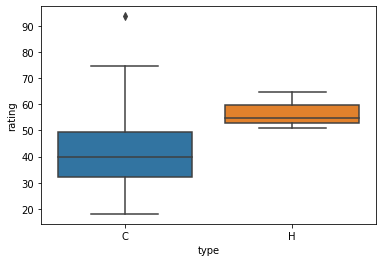

In [180]:
sbs.boxplot(d.type,d.rating)

In [181]:
#Q9. Is there a relation between sugars, calories, carbs, and fat?


In [188]:
d[["sugars","calories","carbo","fat"]].corr()
#sbs.scatterplot(d[["sugars","calories","carbo","fat"]])

,sugars,calories,carbo,fat
sugars,1.000000,0.574182,-0.501086,0.300664
calories,0.574182,1.000000,0.207331,0.510630
carbo,-0.501086,0.207331,1.000000,-0.311619
fat,0.300664,0.510630,-0.311619,1.000000


In [189]:
#sugars and calories,calories and fats are highly correlated. carbo and fat, sugars and carbo are negatively correlated

In [190]:
#Q10. Which manufacturers produce cereal with highest calories?

In [191]:
d.loc[d["calories"]==d["calories"].max(),"mfr"]

45    K
Name: mfr, dtype: object

In [192]:
#Q11. Use correlation tests and visualization to identify if the two variables calories and 
#consumer rating associated?

In [204]:
d["calories"].corr(d["rating"])

-0.6743584519164881

C:\Users\bhavn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calories', ylabel='rating'>

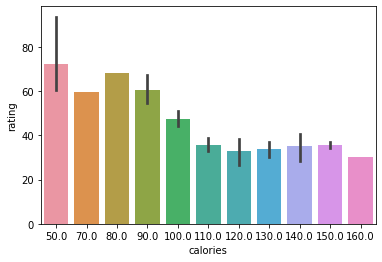

In [205]:
sbs.barplot(d.calories,d.rating)

In [198]:
#generally cereals with high calories seem to have lower ratings

In [199]:
#Q12. Use correlation tests and visualization to identify if the two variables shelf and calories associated?

In [206]:
d["calories"].corr(d["shelf"])

0.1250085852775354

C:\Users\bhavn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calories', ylabel='shelf'>

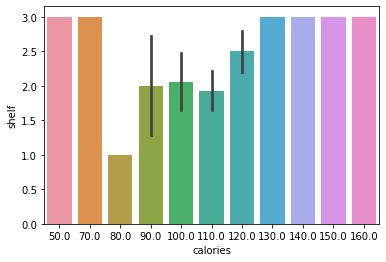

In [207]:
sbs.barplot(d.calories,d.shelf)

In [208]:
#calories and shelf are not very associated, low correlation

In [209]:
#Q13. Is there a relation between manufacturer and rating?


In [217]:
pd.crosstab(d.rating,d.mfr)

mfr,A,G,K,N,P,Q,R
rating,,,,,,,
18.04,0,0,0,0,0,1,0
19.82,0,1,0,0,0,0,0
21.87,0,0,0,0,0,1,0
22.40,0,1,0,0,0,0,0
22.74,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
64.53,0,0,0,1,0,0,0
68.24,0,0,0,1,0,0,0
72.80,0,0,0,1,0,0,0


C:\Users\bhavn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mfr', ylabel='rating'>

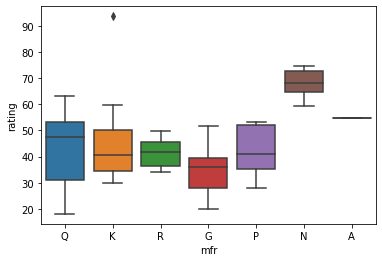

In [214]:
sbs.boxplot(d.mfr,d.rating)

In [218]:
#manufacture N has the most constant ratings even though K has the highest rating value

In [219]:
#Q14. Which nutrients are essential for a good rating for a cereal?

In [221]:
d[["rating","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].corr()


,rating,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
rating,1.000000,0.466593,-0.418454,-0.050595,0.335328,0.160938,-0.774194,0.210411,NaN
protein,0.466593,1.000000,0.226913,-0.120710,0.587843,-0.016296,-0.226812,0.671202,NaN
fat,-0.418454,0.226913,1.000000,-0.248478,0.135546,-0.311619,0.300664,0.357102,NaN
sodium,-0.050595,-0.120710,-0.248478,1.000000,-0.124328,0.444669,-0.288453,-0.158369,NaN
fiber,0.335328,0.587843,0.135546,-0.124328,1.000000,-0.109941,-0.000180,0.791170,NaN
carbo,0.160938,-0.016296,-0.311619,0.444669,-0.109941,1.000000,-0.501086,-0.093629,NaN
sugars,-0.774194,-0.226812,0.300664,-0.288453,-0.000180,-0.501086,1.000000,0.029548,NaN
potass,0.210411,0.671202,0.357102,-0.158369,0.791170,-0.093629,0.029548,1.000000,NaN
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
#rating is most highly correlated with proteins and fibers. hence these are essential for a good rating